In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [93]:
data=pd.read_csv("iris.csv").drop("Id", axis=1)
data                                                                

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [94]:
cols = ['SepalLengthCm', 'SepalWidthCm']
data = data[cols]
data

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [95]:
def euclidean_distance(df):
    n = df.shape[0]
    dist = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            dist[i,j] = np.sqrt(np.sum((df.iloc[i] - df.iloc[j])**2))
    return dist

In [96]:
dist_mat = euclidean_distance(data)
dist_mat

array([[0.        , 0.53851648, 0.5       , ..., 1.48660687, 1.1045361 ,
        0.94339811],
       [0.53851648, 0.        , 0.28284271, ..., 1.6       , 1.36014705,
        1.        ],
       [0.5       , 0.28284271, 0.        , ..., 1.81107703, 1.5132746 ,
        1.21655251],
       ...,
       [1.48660687, 1.6       , 1.81107703, ..., 0.        , 0.5       ,
        0.6       ],
       [1.1045361 , 1.36014705, 1.5132746 , ..., 0.5       , 0.        ,
        0.5       ],
       [0.94339811, 1.        , 1.21655251, ..., 0.6       , 0.5       ,
        0.        ]])

In [97]:
def prims_mst(adj_matrix):
    num_nodes = len(adj_matrix)
    mst = [None] * num_nodes
    key = [float('inf')] * num_nodes
    visited = [False] * num_nodes

    mst[0] = -1
    key[0] = 0

    for _ in range(num_nodes):
        min_key = float('inf')
        u = -1

        for i in range(num_nodes):
            if not visited[i] and key[i] < min_key:
                min_key = key[i]
                u = i

        visited[u] = True

        for v in range(num_nodes):
            if adj_matrix[u][v] and not visited[v] and adj_matrix[u][v] < key[v]:
                mst[v] = u
                key[v] = adj_matrix[u][v]

    mst_adj_matrix = np.zeros_like(adj_matrix)
    for i in range(1, num_nodes):
        parent = mst[i]
        weight = adj_matrix[i][parent]
        mst_adj_matrix[parent][i] = weight

    return mst_adj_matrix
    

mst = prims_mst(dist_mat)   
# count number of edges
print("Number of edges in MST: ", np.count_nonzero(mst))

Number of edges in MST:  149


In [98]:
def plot_graph(df,graph,clusters=None):
    if clusters is None:
        plt.scatter(df.iloc[:,0],df.iloc[:,1],c='blue')
    else:
        for i in range(len(clusters)):
            plt.scatter(df.iloc[list(clusters[i]),0],df.iloc[list(clusters[i]),1])
    for i in range(graph.shape[0]):
        for j in range(graph.shape[1]):
            if graph[i,j] != 0:
                plt.plot([df.iloc[i,0],df.iloc[j,0]],[df.iloc[i,1],df.iloc[j,1]],c='black')        
    
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])

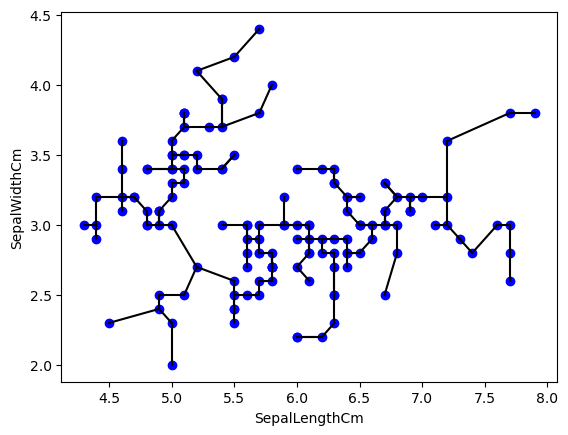

In [99]:
plot_graph(data,mst)
plt.show()

In [100]:
max_dist_indices = np.unravel_index(np.argsort(mst, axis=None)[-2:], mst.shape)
max_dist_indices

(array([ 57, 109]), array([ 41, 117]))

In [101]:
mst_copy = mst.copy()
mst_copy[max_dist_indices] = 0

# find the connected components
G = nx.from_numpy_matrix(mst_copy)
connected_components = list(nx.connected_components(G))
print(connected_components)

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149}, {41}, {131, 117}]


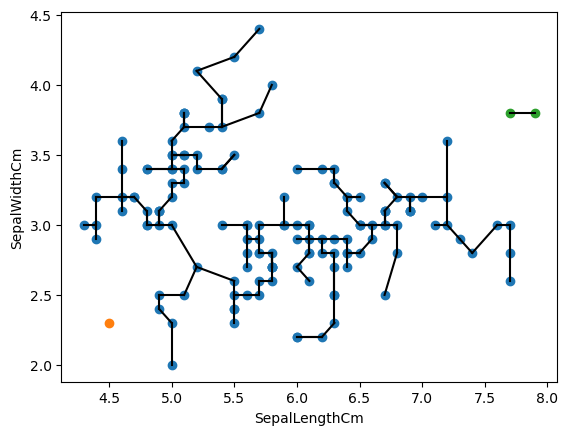

In [102]:
plot_graph(data,mst_copy,connected_components)
plt.show()